# 4.10: Coding Etiquette & Excel Reporting
** **

###  Contents:

1. Importing libraries and files


2. Considering security implications


3. Comparing customer behavior in different geographic areas
    - 3.1 Creating a regional segmentation of the data
    - 3.2 Spending habits of Instacart customers within the U.S. regions


4. Creating an exclusion flag for low-activity customers (customers with less than 5 orders) and excluding them from the data. 
    - 4.1 Excluding low-activity customers from the data and export the subset. 
    - 4.2 Excluding high-activity customers from the data and export the subset. 


5. Customer profiling
    - 5.1 Demographic market segmentation
         
        - 5.1.1 Segmentation by IC customer's age
        - 5.1.2 Segmentation based on IC customer's number of dependents & relationship
        - 5.1.3 Segmentation by IC customer's income
        - 5.1.4 Segmentation by department      
        
    - 5.2 Behavoiral market segmentation   

       - 5.2.1 Non-alocohol drinker customers
       - 5.2.2 Pet owner customers
       - 5.2.3 Vegetarian customers
       - 5.2.4 Parents with babies
       - 5.2.5 Early birds vs night owls


6. Customer profile visualization

7. Customer profile aggregation for usage frequency and expenditure

8. Customer profile comparison in regions and departments

9. Exporting updated dataframes and charts
    - 9.1 Exporting dataframes
    - 9.2 Exporting charts
    
   ** **


## 1. Importing libraries and files
** **

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [2]:
# Setting shared path

path = r'C:\Users\mehrn\OneDrive\Desktop\CareerFoundry Materials\Tasks\Python\10-01-23 Instacart Basket Analysis'

In [3]:
# Importing the recent mereged dataset (orders, products and customers dataframes- From task 4-9)

merged_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cx_ords_prods.pkl'))

In [4]:
# Importing departments Dataframe

depts_df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'), index_col = False)

## 2. Considering security implications
** **

### Sensitive data (PII) addressing

The '*first_name*' and '*last_name*' columns within our dataset could potentially be traced back to a particular person and needs to be addressed.

**How to address:**
Dropping these two columns in compliance to customer privacy and letting the stakeholders know by providing notes in the reports.

In [5]:
# Checkpoint of DataFrame Dimension

merged_df.shape

(30741973, 34)

In [6]:
# Exploring the columns

merged_df.dtypes

user_id                      int32
first_name                  object
last_name                   object
gender                      object
state                       object
age                           int8
date_joined                 object
no_of_dependents              int8
marital_status              object
income                       int32
order_id                     int32
order_number                  int8
orders_day_of_week            int8
order_time_of_day             int8
days_since_prior_order     float16
new_customer                  bool
product_id                 float16
add_to_cart_order          float16
reordered                  float16
product_name                object
aisle_id                      int8
department_id                 int8
prices                     float16
_merge                    category
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order           

In [7]:
# Exploring data in dataset

merged_df.head()

,user_id,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,order_behavior,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,two busiest days,Most orders,8,New customer,5.746094,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly days,Most orders,8,New customer,5.746094,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,two busiest days,Most orders,8,New customer,5.746094,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly busy,Regularly days,Most orders,8,New customer,5.746094,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly busy,two slowest days,Most orders,8,New customer,5.746094,Low spender,19.0,Regular customer


In [8]:
# Dropping PII information 

merged_df = merged_df.drop(columns = ['first_name','last_name'])


In [9]:
# Checking dataset to assure PII is removed from data

merged_df.head()

,user_id,gender,state,age,date_joined,no_of_dependents,marital_status,income,order_id,order_number,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,order_behavior,order_frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Mid-range product,Regularly busy,two busiest days,Most orders,8,New customer,5.746094,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Mid-range product,Regularly busy,Regularly days,Most orders,8,New customer,5.746094,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Mid-range product,Regularly busy,two busiest days,Most orders,8,New customer,5.746094,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Low-range product,Regularly busy,Regularly days,Most orders,8,New customer,5.746094,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Low-range product,Regularly busy,two slowest days,Most orders,8,New customer,5.746094,Low spender,19.0,Regular customer


## 3. Comparing customer behavior in different geographic areas
** **

In [10]:
# Checking state column

merged_df['state'].value_counts(dropna = False)

California              635992
Pennsylvania            627428
Arizona                 625315
Rhode Island            624802
North Carolina          623920
Georgia                 622326
New Mexico              620232
Massachusetts           619550
Wyoming                 617224
Minnesota               617109
Alaska                  615365
Oklahoma                615124
Texas                   614154
Alabama                 610251
Oregon                  610058
Maine                   607090
Louisiana               606465
Virginia                605746
Mississippi             605453
Delaware                604918
Hawaii                  604785
Missouri                604635
Colorado                604624
New York                602860
North Dakota            602448
Kansas                  602439
Ohio                    601370
Indiana                 600947
South Carolina          600803
Nevada                  600554
South Dakota            599233
New Jersey              598908
Arkansas

### 3.1 Creating a regional segmentation of the data

In [11]:
# Defining region lists

region_1_NE = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region_2_MW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region_3_S = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region_4_W = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [12]:
# Assigning region lists' values to a new column (region)

merged_df.loc[merged_df['state'].isin(region_1_NE), 'region'] = 'Northeast'
merged_df.loc[merged_df['state'].isin(region_2_MW), 'region'] = 'Midwest'
merged_df.loc[merged_df['state'].isin(region_3_S), 'region'] = 'South'
merged_df.loc[merged_df['state'].isin(region_4_W), 'region'] = 'West'

In [13]:
#  Checking region values

merged_df['region'].value_counts(dropna = False)

South        10232461
West          7883551
Midwest       7199503
Northeast     5426458
Name: region, dtype: int64

In [14]:
# Checking DataFrame Dimension after adding a new colum

merged_df.shape

(30741973, 33)

### 3.2 Spending habits of Instacart customers within the U.S. regions

In [15]:
# Creating a spending_habits crosstab

crosstab_spending_habits = pd.crosstab (merged_df['spending_flag'], merged_df['region'], dropna = False)

In [16]:
crosstab_spending_habits

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,24875,19029,36847,25358
Low spender,7174628,5407429,10195614,7858193


##  4. Creating an exclusion flag for low-activity customers (with less than 5 orders) 
** **

In [17]:
# Creating activity_flag based on the number of orders

merged_df.loc[merged_df['max_order'] <5, 'activity_flag'] = 'Low activity'
merged_df.loc[merged_df['max_order'] >=5, 'activity_flag'] = 'High activity'
merged_df.tail(10)

,user_id,gender,state,age,date_joined,no_of_dependents,marital_status,income,order_id,order_number,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,order_behavior,order_frequency_flag,region,activity_flag
30741963,80148,Female,New York,55,4/1/2020,1,married,57095,2028188,1,...,Regularly days,Most orders,4,New customer,6.207031,Low spender,12.0,Regular customer,Northeast,Low activity
30741964,80148,Female,New York,55,4/1/2020,1,married,57095,1393131,2,...,two busiest days,Most orders,4,New customer,6.207031,Low spender,12.0,Regular customer,Northeast,Low activity
30741965,80148,Female,New York,55,4/1/2020,1,married,57095,3209855,4,...,Regularly days,Average orders,4,New customer,6.207031,Low spender,12.0,Regular customer,Northeast,Low activity
30741966,80148,Female,New York,55,4/1/2020,1,married,57095,2859858,3,...,Regularly days,Most orders,4,New customer,6.207031,Low spender,12.0,Regular customer,Northeast,Low activity
30741967,80148,Female,New York,55,4/1/2020,1,married,57095,2859858,3,...,Regularly days,Most orders,4,New customer,6.207031,Low spender,12.0,Regular customer,Northeast,Low activity
30741968,80148,Female,New York,55,4/1/2020,1,married,57095,2859858,3,...,Regularly days,Most orders,4,New customer,6.207031,Low spender,12.0,Regular customer,Northeast,Low activity
30741969,80148,Female,New York,55,4/1/2020,1,married,57095,2859858,3,...,Regularly days,Most orders,4,New customer,6.207031,Low spender,12.0,Regular customer,Northeast,Low activity
30741970,80148,Female,New York,55,4/1/2020,1,married,57095,2859858,3,...,Regularly days,Most orders,4,New customer,6.207031,Low spender,12.0,Regular customer,Northeast,Low activity
30741971,80148,Female,New York,55,4/1/2020,1,married,57095,2859858,3,...,Regularly days,Most orders,4,New customer,6.207031,Low spender,12.0,Regular customer,Northeast,Low activity
30741972,80148,Female,New York,55,4/1/2020,1,married,57095,3209855,4,...,Regularly days,Average orders,4,New customer,6.207031,Low spender,12.0,Regular customer,Northeast,Low activity


In [18]:
# Checking new added column

merged_df['activity_flag'].value_counts(dropna = False)

High activity    29331094
Low activity      1410879
Name: activity_flag, dtype: int64

In [19]:
merged_df.dtypes

user_id                      int32
gender                      object
state                       object
age                           int8
date_joined                 object
no_of_dependents              int8
marital_status              object
income                       int32
order_id                     int32
order_number                  int8
orders_day_of_week            int8
order_time_of_day             int8
days_since_prior_order     float16
new_customer                  bool
product_id                 float16
add_to_cart_order          float16
reordered                  float16
product_name                object
aisle_id                      int8
department_id                 int8
prices                     float16
_merge                    category
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                     int8
loyalty_flag                object
avg_price           

### 4.1 Excluding Low Activity customers from the data and export the subset. 

In [20]:
# Create a subset which excludes low_activity customers

high_activity_cxs = merged_df[merged_df['activity_flag'] == 'High activity']
high_activity_cxs.tail()

,user_id,gender,state,age,date_joined,no_of_dependents,marital_status,income,order_id,order_number,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,order_behavior,order_frequency_flag,region,activity_flag
30741927,135902,Female,Missouri,66,4/1/2020,2,married,53374,2968873,6,...,Regularly days,Most orders,8,New customer,7.640625,Low spender,8.0,Frequent customer,Midwest,High activity
30741928,135902,Female,Missouri,66,4/1/2020,2,married,53374,1104840,3,...,Regularly days,Most orders,8,New customer,7.640625,Low spender,8.0,Frequent customer,Midwest,High activity
30741929,135902,Female,Missouri,66,4/1/2020,2,married,53374,2498530,8,...,Regularly days,Average orders,8,New customer,7.640625,Low spender,8.0,Frequent customer,Midwest,High activity
30741930,135902,Female,Missouri,66,4/1/2020,2,married,53374,2498530,8,...,Regularly days,Average orders,8,New customer,7.640625,Low spender,8.0,Frequent customer,Midwest,High activity
30741931,135902,Female,Missouri,66,4/1/2020,2,married,53374,1104840,3,...,Regularly days,Most orders,8,New customer,7.640625,Low spender,8.0,Frequent customer,Midwest,High activity


In [21]:
# Moved to section 9 ---> Export high_activity_cxs in .pkl format

# high_activity_cxs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_cxs_orders.pkl'))

### 4.2 Excluding high-activity customers from the data and export the subset. 

In [22]:
# Create a subset which excludes High_activity customers

low_activity_cxs = merged_df[merged_df['activity_flag'] == 'Low activity']
low_activity_cxs.head()

,user_id,gender,state,age,date_joined,no_of_dependents,marital_status,income,order_id,order_number,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,order_behavior,order_frequency_flag,region,activity_flag
729,168851,Male,South Carolina,30,1/1/2017,0,single,63712,1903574,1,...,Regularly days,Most orders,3,New customer,7.488281,Low spender,15.0,Regular customer,South,Low activity
730,168851,Male,South Carolina,30,1/1/2017,0,single,63712,1193140,2,...,two slowest days,Most orders,3,New customer,7.488281,Low spender,15.0,Regular customer,South,Low activity
731,168851,Male,South Carolina,30,1/1/2017,0,single,63712,1870356,3,...,two busiest days,Most orders,3,New customer,7.488281,Low spender,15.0,Regular customer,South,Low activity
732,168851,Male,South Carolina,30,1/1/2017,0,single,63712,1903574,1,...,Regularly days,Most orders,3,New customer,7.488281,Low spender,15.0,Regular customer,South,Low activity
733,168851,Male,South Carolina,30,1/1/2017,0,single,63712,1193140,2,...,two slowest days,Most orders,3,New customer,7.488281,Low spender,15.0,Regular customer,South,Low activity


In [23]:
# Moved to section 9 ---> Export low_activity_cxs in .pkl format 
# low_activity_cxs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_cxs_orders.pkl'))

## 5. Customer profiling
** **

### 5.1 Demographic market segmentation

#### 5.1.1 Segmentation based on IC customer's age

We will be using 'high_activity_cxs' dataset to profile customers, since the Instacart CFO isn’t interested in customers who don’t generate much revenue for the app.

In [24]:
#Catching warning messages

pd.options.mode.chained_assignment = None

In [25]:
# Start profiling high activity customers

cstmrs = high_activity_cxs

In [26]:
# Exploring descriptive statistics of 'age' column

cstmrs['age'].describe()

count    2.933109e+07
mean     4.946163e+01
std      1.849131e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

**Result:**  The output of describe() function shows that 18 is the youngest age while age 81 is the oldest one within the data.

- Therefore, age groups will be calssifed as:
    - a) Youth         18 - 39
    - b) Middle Age    40 - 64
    - c) Seniors   65 and older

In [27]:
# Creating age categories

cstmrs.loc[(cstmrs['age'] >= 18) & (cstmrs['age'] < 40), 'age_category'] = 'Youth'
cstmrs.loc[(cstmrs['age'] >= 40) & (cstmrs['age'] < 65), 'age_category'] = 'Middle age'
cstmrs.loc[cstmrs['age'] >= 65, 'age_category'] = 'Senior'
cstmrs['age_category'].value_counts()

Middle age    11457580
Youth         10111621
Senior         7761893
Name: age_category, dtype: int64

In [28]:
# Double checking the 'cstmrs' dataset to see the added column

cstmrs.shape

(29331094, 35)

#### 5.1.2 Segmentation based on IC customer's number of dependents & relationship

In [29]:
# Exploring 'no_of_dependents'

cstmrs['no_of_dependents'].describe()

count    2.933109e+07
mean     1.501290e+00
std      1.119170e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: no_of_dependents, dtype: float64

**Result:**  The output of describe() function on 'no_of_dependents' shows that 0 is the min while 3 is the largest number of dependents in a family.

- Therefore, family size groups will be calssifed as:
    - a) Small         0
    - b) Mid size    1-2
    - c) Large   3
    

In [30]:
# Creating family_size column 

cstmrs.loc[cstmrs['no_of_dependents'] == 0, 'family_size'] = 'Small'
cstmrs.loc[(cstmrs['no_of_dependents'] == 1) | (cstmrs['no_of_dependents'] == 2), 'family_size'] = 'Mid size'
cstmrs.loc[cstmrs['no_of_dependents'] > 2, 'family_size'] = 'Large'

In [31]:
cstmrs['family_size'].value_counts(dropna = False)

Mid size    14628253
Large        7359864
Small        7342977
Name: family_size, dtype: int64

In [32]:
#Exploring the connection of 'marital_status' and 'no_of_dependents'

family_crosstab = pd.crosstab(cstmrs['marital_status'],cstmrs['no_of_dependents'],dropna = False)

In [33]:
family_crosstab

no_of_dependents,0,1,2,3
marital_status,,,,
divorced/widowed,2508308,0,0,0
living with parents and siblings,0,479901,457746,459961
married,0,6821707,6868899,6899903
single,4834669,0,0,0


In [34]:
cstmrs.loc[(cstmrs['marital_status'] == 'married') & (cstmrs['no_of_dependents'] == 1), 'household'] = 'Couple without children'
cstmrs.loc[(cstmrs['marital_status'] == 'married') & (cstmrs['no_of_dependents'] >= 2), 'household'] = 'Couple with children'
cstmrs.loc[(cstmrs['marital_status'] == 'divorced/widowed') | (cstmrs['marital_status'] == 'single'), 'household'] = 'One person'
cstmrs.loc[(cstmrs['marital_status'] == 'divorced/widowed') & (cstmrs['no_of_dependents'] > 0 ), 'household'] = 'Single parent'
cstmrs.loc[cstmrs['marital_status'] == 'living with parents and siblings', 'household'] = 'Other family'

In [35]:
# Checking new column (household)

cstmrs['household'].value_counts(dropna = False)

Couple with children       13768802
One person                  7342977
Couple without children     6821707
Other family                1397608
Name: household, dtype: int64

In [36]:
# Confirming added column

cstmrs.shape

(29331094, 37)

#### 5.1.3 Segmentation by IC customer's income

In [37]:
# Exploring to categorize the income column

cstmrs['income'].describe()

count    2.933109e+07
mean     9.930583e+04
std      4.240738e+04
min      2.590300e+04
25%      6.711500e+04
50%      9.663300e+04
75%      1.278428e+05
max      5.939010e+05
Name: income, dtype: float64

**Result:**  The output of describe() function on 'income' determines that 25.9k USD is the lowest income whereas 593.9k USD is the highest income reported by IC families.

- Therefore, income catrgories will be calssifed as:
    - a) Low         < 70K USD
    - b) Middle      70K- 100K USD
    - c) Upper mid   100k-130K
    - d) High        > 130K

In [38]:
# Creating income_category column

cstmrs.loc[cstmrs['income']< 70000, 'income_category'] = 'Low'
cstmrs.loc[(cstmrs['income']>= 70000) & (cstmrs['income']< 100000), 'income_category'] = 'Middle'
cstmrs.loc[(cstmrs['income']>= 100000) & (cstmrs['income']< 130000), 'income_category'] = 'Upper mid'
cstmrs.loc[cstmrs['income']>= 130000, 'income_category'] = 'High'

In [39]:
# Checking income_category values

cstmrs['income_category'].value_counts(dropna = False)

Low          8123873
Middle       7801526
High         6977845
Upper mid    6427850
Name: income_category, dtype: int64

In [40]:
# Confirming the added column

cstmrs.shape

(29331094, 38)

#### 5.1.4 Segmentation by department

#### Note: 
As we don't have the department names in 'cstmrs' dataset, we need to use 'department' dataframe to map 'depatment_id's to department names.


In [41]:
# calling 'department' dataframe
depts_df

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [42]:
# Renaming index column to a clear naem

depts_df.rename(columns= {"Unnamed: 0": "department_id"}, inplace=True)

In [43]:
# Pairing the tupple of {'department_id' , 'department'} with zip() function to create a dictionary

dprt_map=dict(zip(depts_df["department_id"], depts_df["department"]))

In [44]:
dprt_map

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [45]:
# Mapping customers to department df by the map() function and department dictionary(dprt_map)

cstmrs['department'] = cstmrs['department_id'].map(dprt_map)

In [46]:
# Confirming new added column

cstmrs.shape

(29331094, 39)

In [47]:
# Distribution of 'department' values in 'cstmrs' dataframe

cstmrs['department'].value_counts(dropna = False)

personal care      3626087
snacks             3575113
dairy eggs         2605753
frozen             2491686
pantry             2458325
beverages          2325339
produce            1757125
household          1570391
canned goods       1327190
alcohol            1005935
dry goods pasta    1005574
breakfast           751765
babies              745396
missing             690285
deli                682453
pets                580724
international       574681
meat seafood        547279
bakery              531316
other               474392
bulk                  4285
Name: department, dtype: int64

### 5.2 Behavoiral market segmentation

#### 5.2.1 Non-Alocohol drinker Customers

In [48]:
# Creating alcohol_drinker column

cstmrs.loc[cstmrs['department'] !='alcohol', 'alcohol_drinker'] = 'No'
cstmrs.loc[cstmrs['department'] =='alcohol', 'alcohol_drinker'] = 'Yes'

In [49]:
cstmrs['alcohol_drinker'].value_counts(dropna = False)

No     28325159
Yes     1005935
Name: alcohol_drinker, dtype: int64

In [50]:
# Confirming new added column

cstmrs.shape

(29331094, 40)

#### 5.2.2 Pet owner customers

In [51]:
# Creating pet_owner column

cstmrs.loc[cstmrs['department'] == 'pets', 'pet_owner'] = 'Yes'
cstmrs.loc[cstmrs['department'] != 'pets', 'pet_owner'] = 'No'

In [52]:
cstmrs.shape

(29331094, 41)

In [53]:
cstmrs['pet_owner'].value_counts(dropna= False)

No     28750370
Yes      580724
Name: pet_owner, dtype: int64

#### 5.2.3 Vegetarian customers
       

In [54]:
#Creating a list to assign 'vegetarian' column's values. If a customer never purchased 'meat seafood' or deli, then we assume them a vegetarian.
result = []
for value in cstmrs['department_id']:
    # 12 means 'meat seafood', 20 is the department_id of 'deli'
    if value not in (12,20):
        result.append('Yes')
    else:
        result.append('No')
result

['Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Y

In [55]:
# Assigning 'result' list values to 'vegetarian' column

cstmrs['vegetarian'] = result

In [56]:
# Confirming 'vegetarian' column was added

cstmrs.shape

(29331094, 42)

In [57]:
# Investigating 'vegetarian' values in customers

cstmrs['vegetarian'].value_counts(dropna = False)

Yes    28101362
No      1229732
Name: vegetarian, dtype: int64

#### 5.2.4 Parents with babies

In [58]:
# Creating 'parents_with_baby' column based on department

cstmrs.loc[cstmrs['department'] !='babies', 'parents_with_baby'] = 'No'
cstmrs.loc[cstmrs['department'] =='babies', 'parents_with_baby'] = 'Yes'

In [59]:
cstmrs.shape

(29331094, 43)

In [60]:
# Exploring new column : 'parents_with_baby'

cstmrs['parents_with_baby'].value_counts(dropna = False)

No     28585698
Yes      745396
Name: parents_with_baby, dtype: int64

#### 5.2.5 Early birds vs night owls

In [61]:
# Exploring the distribution of orders in 24 hours a day

cstmrs['order_time_of_day'].value_counts(dropna = False).sort_index()

0      197913
1      103953
2       62102
3       46275
4       48272
5       79829
6      265980
7      818979
8     1571207
9     2237575
10    2507293
11    2470360
12    2360781
13    2403788
14    2431473
15    2403760
16    2289246
17    1880235
18    1472926
19    1133786
20     882463
21     723052
22     575037
23     364809
Name: order_time_of_day, dtype: int64

In [62]:
# Creating 'period_of_day' column based on order time

cstmrs.loc[cstmrs['order_time_of_day'] <5 , 'order_time_habit'] = 'Night owl'
cstmrs.loc[(cstmrs['order_time_of_day']>= 9) & (cstmrs['order_time_of_day']<= 23), 'order_time_habit'] = 'Regular'
cstmrs.loc[(cstmrs['order_time_of_day']>= 5) & (cstmrs['order_time_of_day']< 9), 'order_time_habit'] = 'Early bird'

In [63]:
cstmrs['order_time_habit'].value_counts(dropna = False)

Regular       26136584
Early bird     2735995
Night owl       458515
Name: order_time_habit, dtype: int64

### 6. Customer profile visualization

Text(0.5, 1.0, 'Alcohol-drinkers Distribution')

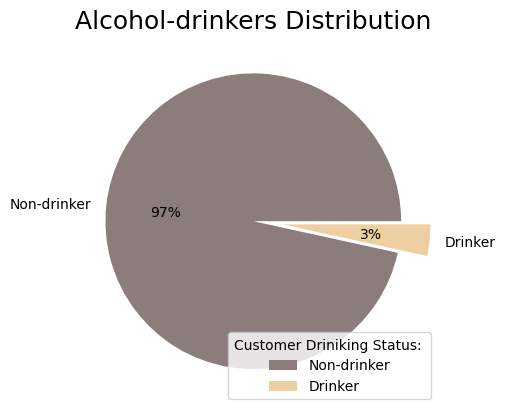

In [64]:
# Drwing a pie chart for alcohol drinking profiling

alcohol_drinker_pie = cstmrs['alcohol_drinker'].value_counts().plot.pie(labels = ['Non-drinker','Drinker'], autopct=('%1.f%%'), colors = ['#8B7D7B', '#EECFA1'], label = '', explode = [0,0.2])
alcohol_drinker_pie.legend(title = 'Customer Driniking Status: ', loc = 'lower right')
plt.title("Alcohol-drinkers Distribution", fontsize = '18')



Text(0.5, 1.0, 'Pet-owner Customers Distribution')

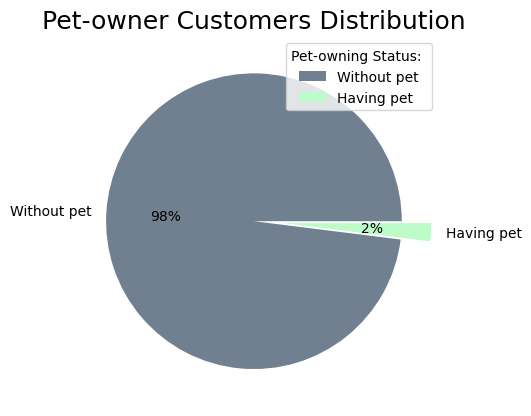

In [65]:
# Drawing a pie chart of pet owners for IC customers

pet_owner_pie = cstmrs['pet_owner'].value_counts().plot.pie(labels = ['Without pet','Having pet'], autopct=('%1.f%%'), colors = ['#708090','#BDFCC9'], label = '', explode = [0,0.2])
pet_owner_pie.legend(title = 'Pet-owning Status: ', loc = 'upper right')
plt.title( "Pet-owner Customers Distribution", fontsize= '18')

Text(0.5, 0, 'Order Habits')

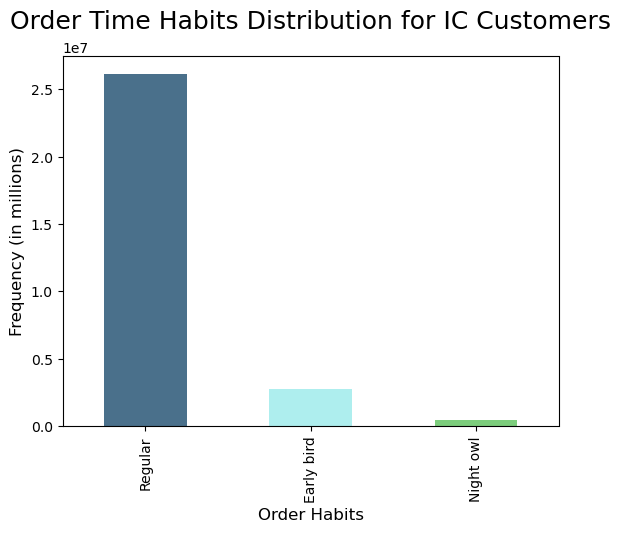

In [66]:
# Drawing a bar chart of 'order_time_habit' column

time_habit_bar = cstmrs['order_time_habit'].value_counts().plot.bar( color = ['#4A708B', '#AEEEEE', '#7CCD7C'])
plt.title('Order Time Habits Distribution for IC Customers', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Order Habits',  fontsize = 12)


#### **Chart Observation:**
Over 80% of IC customers prefer to place their orders between 9am to 23pm, ie. not as an early bird nor night owl.

In [67]:
# Drawing a stacked-bar chart of 'income_category' column in different regions

crosstab_income_region = pd.crosstab (cstmrs['region'],cstmrs['income_category'], dropna = False)
crosstab_income_region

income_category,High,Low,Middle,Upper mid
region,,,,
Midwest,1662309,1881216,1784074,1542580
Northeast,1234064,1413071,1385730,1141331
South,2302795,2718472,2641368,2099712
West,1778677,2111114,1990354,1644227


Text(0.5, 0, 'Region')

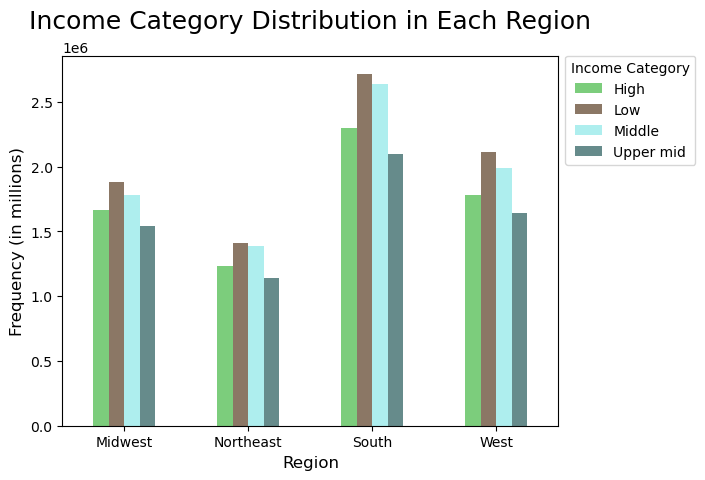

In [68]:
# Drawing a bar chart of income categorie in the US regions

bar_inc_reg = crosstab_income_region.plot(kind = 'bar', rot = 0, color= ['#7CCD7C', '#8B7765', '#AEEEEE', '#668B8B'])
# The default for bbox_to_anchor is (0,0,1,1), which is a bounding box over the complete axes. If a different bounding box is specified, is is usually sufficient to use the first two values, which give (x0, y0) of the bounding box.
bar_inc_reg.legend(title='Income Category', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Income Category Distribution in Each Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

#### **Chart Observation:**
Low-income customers have the higest population between IC customers. We might help them by announcing promotions and discounts on products which are most poular items among their orders.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Couple with children'),
  Text(1, 0, 'One person'),
  Text(2, 0, 'Couple without children'),
  Text(3, 0, 'Other family')])

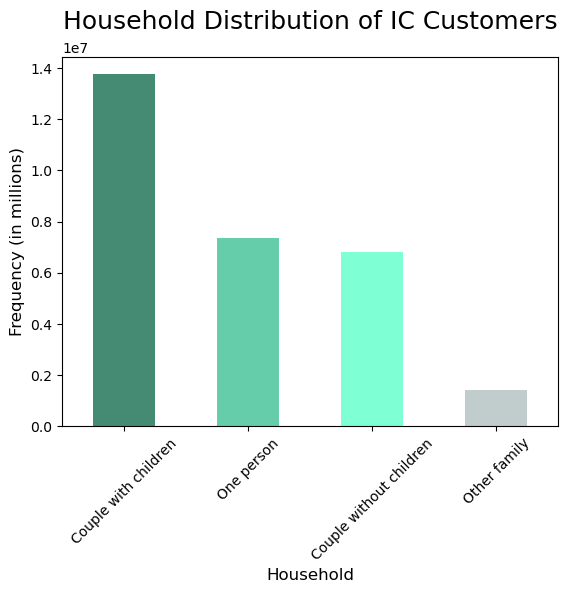

In [69]:
bar_household = cstmrs['household'].value_counts().plot.bar(color= ['#458B74', '#66CDAA', '#7FFFD4', '#C1CDCD'])
plt.title('Household Distribution of IC Customers', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Household',  fontsize = 12)
plt.xticks(rotation=45)

#### **Chart Observation:**

Couples with children have the higest population between IC households. This would impact the promotions and marketing campaigns.

### 7. Customer profile aggregation for usage frequency and expenditure


In [70]:
# Department category expenditure aggregation

cstmrs.groupby('department').agg({'prices' : ['mean', 'min', 'max']})

prices                     
                      mean       min        max
department                                     
alcohol           9.914062  1.200195  15.000000
babies            9.156250  1.400391  15.000000
bakery            7.968750  1.099609  14.898438
beverages         8.437500  1.000000  15.000000
breakfast         7.246094  1.099609  14.703125
bulk              9.773438  5.398438  12.898438
canned goods      8.242188  1.000000  15.000000
dairy eggs        7.460938  1.000000  15.000000
deli              8.671875  1.000000  15.000000
dry goods pasta   7.621094  1.000000  15.000000
frozen            8.687500  1.099609  15.000000
household         7.992188  1.000000  15.000000
international     8.640625  1.099609  14.796875
meat seafood     15.296875  8.203125  24.906250
missing           5.570312  1.200195  14.898438
other            10.968750  1.099609  14.601562
pantry            8.312500  1.000000  20.000000
personal care     8.820312  1.000000  15.000000
pets              8.460938  1.000000  14.796875
produce           7.820312  1.099609  14.796875
snacks            4.332031  1.599609   7.000000

In [71]:
# Age category usage frequency aggregation

cstmrs.groupby('age_category').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order            
                          mean  min    max
age_category                              
Middle age            8.265625  1.0  145.0
Senior                8.242188  1.0   99.0
Youth                 8.335938  1.0  109.0

In [72]:
# Region expenditure aggregation

cstmrs.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices               
               mean  min       max
region                            
Midwest    7.949219  1.0  24.90625
Northeast  7.949219  1.0  24.90625
South      7.957031  1.0  24.90625
West       7.957031  1.0  24.90625

In [73]:
# Region usage frequency aggregation

cstmrs.groupby('region').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order            
                       mean  min    max
region                                 
Midwest            8.273438  1.0  109.0
Northeast          8.281250  1.0  145.0
South              8.289062  1.0  137.0
West               8.289062  1.0  114.0

In [74]:
# Household usage frequency aggregation

cstmrs.groupby('household').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order            
                                     mean  min    max
household                                            
Couple with children             8.289062  1.0  145.0
Couple without children          8.289062  1.0  114.0
One person                       8.265625  1.0  137.0
Other family                     8.281250  1.0  102.0

In [75]:
# Income category expenditure aggregation

cstmrs.groupby('income_category').agg({'prices' : ['mean', 'min', 'max']})

prices               
                     mean  min       max
income_category                         
High             7.980469  1.0  24.90625
Low              7.878906  1.0  24.90625
Middle           7.980469  1.0  24.90625
Upper mid        7.980469  1.0  24.90625

In [76]:
# Income category usage frequency aggregation

cstmrs.groupby('income_category').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order            
                             mean  min    max
income_category                              
High                     8.414062  1.0  121.0
Low                      7.882812  1.0  137.0
Middle                   8.453125  1.0  114.0
Upper mid                8.445312  1.0  145.0

In [77]:
# Order-time habit with usage frequency aggregation

cstmrs.groupby('order_time_habit').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order            
                              mean  min    max
order_time_habit                              
Early bird                8.460938  1.0   93.0
Night owl                 8.515625  1.0  109.0
Regular                   8.257812  1.0  145.0

In [78]:
# Order-time habit with expenditure aggregation

cstmrs.groupby('order_time_habit').agg({'prices' : ['mean', 'min', 'max']})

prices               
                      mean  min       max
order_time_habit                         
Early bird        7.968750  1.0  24.90625
Night owl         7.925781  1.0  24.90625
Regular           7.953125  1.0  24.90625

In [79]:
# Parents with babies in usage frequency aggregation

cstmrs.groupby('parents_with_baby').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order            
                               mean  min    max
parents_with_baby                              
No                         8.273438  1.0  145.0
Yes                        8.554688  1.0  104.0

In [80]:
# Parents with babies in expenditure aggregation

cstmrs.groupby('parents_with_baby').agg({'prices' : ['mean', 'min', 'max']})

prices                    
                       mean       min       max
parents_with_baby                              
No                 7.921875  1.000000  24.90625
Yes                9.156250  1.400391  15.00000

In [81]:
# Vegetarians and meat lovers in usage frequency aggregation

cstmrs.groupby('vegetarian').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order            
                        mean  min    max
vegetarian                              
No                  8.632812  1.0  137.0
Yes                 8.265625  1.0  145.0

In [82]:
# Vegetarians and meat lovers in expenditure aggregation

cstmrs.groupby('vegetarian').agg({'prices' : ['mean', 'min', 'max']})

prices               
                 mean  min       max
vegetarian                          
No          11.617188  1.0  24.90625
Yes          7.792969  1.0  20.00000

### 8. Customer profile comparison in regions and departments

In [83]:
# Investigating the connection of age categories and the day of drders

crosstab_age_day = pd.crosstab(cstmrs['age_category'], cstmrs['orders_day_of_week'], dropna = False)

Text(0.5, 0, 'Age Category')

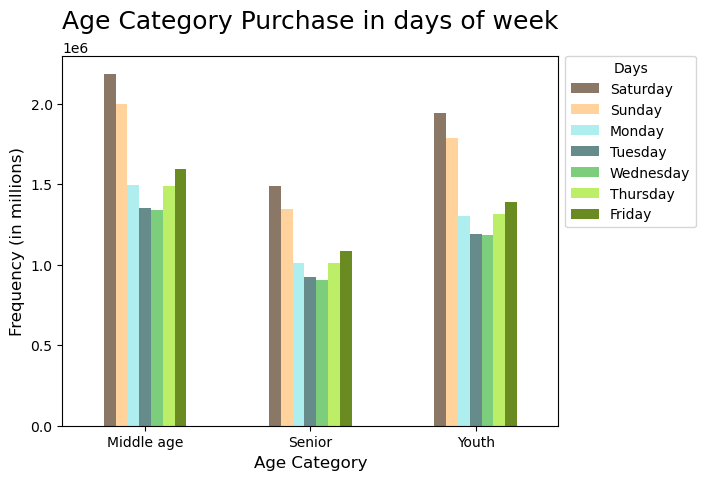

In [84]:
# Visualization of crosstab_age_day

bar_age_day = crosstab_age_day.plot(kind = 'bar', rot = 0, color= ['#8B7765', '#FFD39B', '#AEEEEE', '#668B8B', '#7CCD7C','#BCEE68', '#698B22'])
bar_age_day.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Age Category Purchase in days of week', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Category',  fontsize = 12)

**Chart Observation:** Saturday is the busiest day and Wednsday is the slowest day in a week within the age categories' in terms of orders. The trend of ordering in a week follows the same behaviors for three age categories.

In [85]:
crosstab_vegetarian = pd.crosstab(cstmrs['region'], cstmrs['vegetarian'], dropna = False)
crosstab_vegetarian

vegetarian,No,Yes
region,,
Midwest,284585,6585594
Northeast,216462,4957734
South,412404,9349943
West,316281,7208091


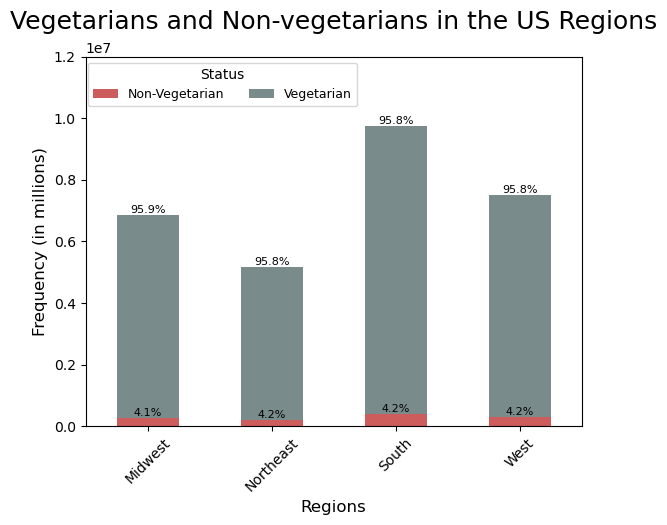

In [86]:
# Plotting the stacked bar

bar_region_veg = crosstab_vegetarian.plot(kind = 'bar', stacked = True, color =['#CD5C5C', '#7A8B8B'])
bar_region_veg.legend(title='Status', bbox_to_anchor=(0.56, 1.0), loc='upper right', ncol = 2, labels=['Non-Vegetarian', 'Vegetarian'], fontsize = 9)
plt.title('Vegetarians and Non-vegetarians in the US Regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Regions',  fontsize = 12)
plt.xticks(rotation=45)

# Annotating the stacked bar chart

# Get the total for each row
total = crosstab_vegetarian.sum(axis=1)

# Calculate the percent for each row
per = crosstab_vegetarian.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_region_veg.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c, per[(label)])]
    
    # Add the annotation
    bar_region_veg.bar_label(c, labels=labels, label_type='edge', fontsize = 8)  
    
    # Set the y axis limit to increase the axis length
    plt.ylim(0, 12000000)


**Chart Observation:** Meat lovers are only less than 5% of customers in all the US regions. This means over 95% of customers purchase their meat/fish needs from other providers rather than Instacart or they are not interested in buying meat/fish/deli products. All the regions in the US present almost the same proportion.

In [87]:
# Creating order_time_habit and region connection

ct_habit = pd.crosstab(cstmrs['region'], cstmrs['order_time_habit'], dropna = False)
ct_habit

order_time_habit,Early bird,Night owl,Regular
region,,,
Midwest,635790,108549,6125840
Northeast,486800,82134,4605262
South,919585,150486,8692276
West,693820,117346,6713206


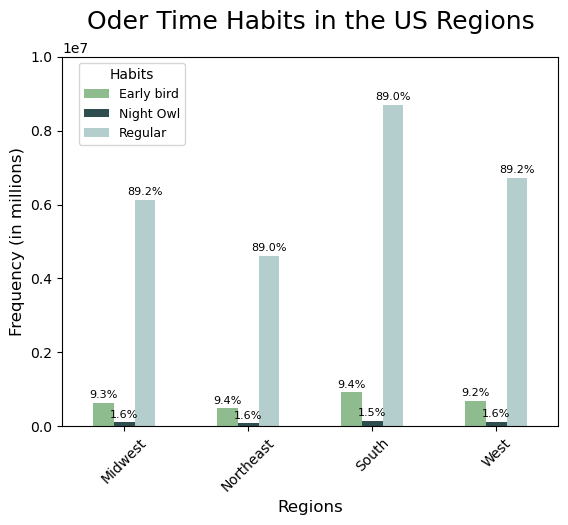

In [88]:
# Plotting the stacked bar

bar_hbt_rgn = ct_habit.plot(kind = 'bar', stacked = False, color =['#8FBC8F', '#2F4F4F','#B4CDCD'])
bar_hbt_rgn.legend(title='Habits', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Early bird', 'Night Owl', 'Regular'], fontsize = 9)
plt.title('Oder Time Habits in the US Regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Regions',  fontsize = 12)
plt.xticks(rotation=45)

# Annotating the bar chart

# Get the total for each row
total = ct_habit.sum(axis=1)

# Calculate the percent for each row
per = ct_habit.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_hbt_rgn.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c,per[(label)])]
    
    # Add the annotation
    bar_hbt_rgn.bar_label(c, labels=labels, label_type='edge', fontsize = 8, rotation = 0,  fontweight= 'normal', padding = 2)  
    
    # Set the y axis limit to increase the axis length
    plt.ylim(0, 10000000)


**Chart Observation:** We can observe the same behavior for all the four regions here as well. Around 90% of orders came through regular customers, ~9% of orders have been submitted in early birds and less than 2% has been made by night owl customers.

In [89]:
ct_hbt_dept = pd.crosstab(cstmrs['department'], cstmrs['order_time_habit'], dropna = False)
ct_hbt_dept

order_time_habit,Early bird,Night owl,Regular
department,,,
alcohol,93024,15171,897740
babies,71995,11499,661902
bakery,49519,8454,473343
beverages,216038,36655,2072646
breakfast,70357,11768,669640
bulk,428,74,3783
canned goods,121325,20329,1185536
dairy eggs,250536,39513,2315704
deli,62565,10892,608996


(-1.0, 22.0)

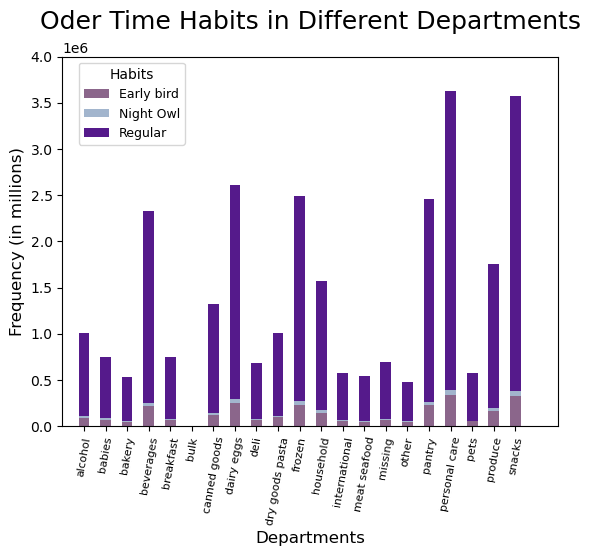

In [90]:
# Plotting the stacked bar

bar_hbt_dept = ct_hbt_dept.plot(kind = 'bar', stacked = True, color =['#8B668B','#A2B5CD','#551A8B'])
bar_hbt_dept.legend(title='Habits', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Early bird', 'Night Owl', 'Regular'], fontsize = 9)
plt.title('Oder Time Habits in Different Departments', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Departments',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

# Set the y axis limit to increase the axis length
plt.ylim(0, 4000000)
plt.xlim(-1, 22)

**Chart Observation:** Over 90% of orders for almost all the departments have been submitted by regular customers. Personal care and snacks have the highest number of orders in Instacart.

In [91]:
ct_bybs = pd.crosstab(cstmrs['region'], cstmrs['parents_with_baby'], dropna = False)

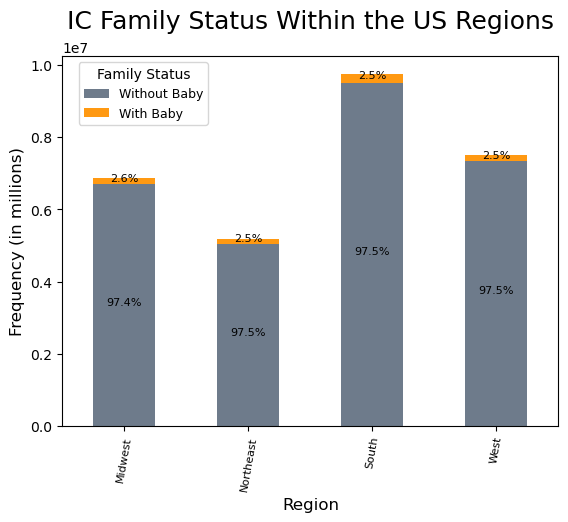

In [92]:
bar_bybs = ct_bybs.plot(kind = 'bar', stacked = True, color= ['#6E7B8B', '#FF9912'])
bar_bybs.legend(title='Family Status', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Without Baby', 'With Baby'], fontsize = 9)
plt.title('IC Family Status Within the US Regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

# Annotating the stacked bar chart

# Get the total for each row
total = ct_bybs.sum(axis=1)

# Calculate the percent for each row
per = ct_bybs.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_bybs.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c,per[(label)])]
    
    # Add the annotation
    bar_bybs.bar_label(c, labels=labels, label_type='center', fontsize = 8, rotation = 0,  fontweight= 'normal', padding = 2)  


#### **Chart Observation:**
Over 97% of families don't have a baby. This could lead to the targeted promotions and marketing campaigns. 

### 9. Exporting updated dataframes and charts

#### 9.1 Exporting dataframes

In [93]:
#Export low_activity_cxs in .pkl format

low_activity_cxs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_cxs_orders.pkl'))

In [94]:
#Export high_activity_cxs in .pkl format

cstmrs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cx_profiling.pkl'))

#### 9.2 Exporting charts

In [95]:
# Exporting alcohol_drinker distribution pie chart in .png format

alcohol_drinker_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'alcohol_drinker_pie.png'), bbox_inches='tight')

In [96]:
# Exporting pet_owner distribution pie chart in .png format

pet_owner_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_owner_pie.png'), bbox_inches='tight')

In [97]:
# Exporting order_time_habit distribution bar chart in .png format

time_habit_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'time_habit_bar.png'), bbox_inches='tight')

In [98]:
# Exporting income (in the US regions) bar chart in .png format

bar_inc_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_inc_reg.png'), bbox_inches='tight')

In [99]:
# Exporting household distribution bar chart in .png format

bar_household.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_household.png'), bbox_inches='tight')

In [100]:
# Exporting age categories (between IC customers by week) bar chart in .png format

bar_age_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_day.png'), bbox_inches='tight')

In [101]:
# Exporting vegetarians (in the US regions) bar chart in .png format

bar_region_veg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_veg.png'), bbox_inches='tight')

In [102]:
# Exporting order_time_habits (in the US regions) bar chart in .png format

bar_hbt_rgn.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hbt_rgn.png'), bbox_inches='tight')

In [103]:
# Exporting order_time_habits (by department) bar chart in .png format

bar_hbt_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hbt_dept.png'), bbox_inches='tight')

In [104]:
# Exporting parents_with_babies bar chart in .png format

bar_bybs.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_bybs.png'), bbox_inches='tight')